In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
import matplotlib.pyplot as plt
import statsmodels
import numpy as np
from sklearn import metrics
import sklearn


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


#eta2[H] = (H - k + 1)/(n - k); 
#$where H is the value obtained in the Kruskal-Wallis test; k is the number of groups; 
#n is the total number of observations.

def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object



def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    

def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))



In [5]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final


def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))


In [7]:
word_analysis = []
path = os.listdir("/export/c12/afavaro/csv_png_files/")
print(len(path))
for elem in path:
    if "word.csv" in elem:
        word_analysis.append(os.path.join('/export/c12/afavaro/csv_png_files/', elem))
        

5651


In [8]:
tasks = []
list_of_dataframes = []
for element in word_analysis:
#pathx = '/export/c12/afavaro/csv_png_files/NLS_10_ses1_SecuencestroopPrevious2-word.csv'
    participant = pd.read_csv(element)
    name = os.path.basename(element).split("_ses")[0]
   # task = os.path.basename(element).split("_")[3].strip("-word.csv")
    task = os.path.basename(element)
    tasks.append(task)
    
len(tasks)

2642

In [9]:
list_of_dataframes = []
for element in word_analysis:
#pathx = '/export/c12/afavaro/csv_png_files/NLS_10_ses1_SecuencestroopPrevious2-word.csv'
    participant = pd.read_csv(element)
    name = os.path.basename(element).split("_ses")[0]
    task = os.path.basename(element)
    if "ses1" in task:
        #print(task)
        task = task.split("ses1_")[1]
        task = task.split("-word.csv")[0]
        
    if "ses2" in task:
       # print(every)
        task = task.split("ses2_")[1]
        task = task.split("-word.csv")[0]
        
    if "ses3" in task:
       # print(every)
        task = task.split("ses3_")[1]
        task = task.split("-word.csv")[0]
        
    mean = participant.Time.mean()
    std = participant.Time.std()
    kurtosis = participant.Time.kurtosis()
    skew = participant.Time.skew()
    d = {'name': name, 'task': task,'Rhythm (σ)': std,'rhythm_skew': skew} # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(d, index =[0])
    list_of_dataframes.append(df)

data = pd.concat(list_of_dataframes, sort=False)
data = data.dropna()

In [10]:
# Add Labels
label_seneca = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist()
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data['name'].tolist()

,name,task,Rhythm (σ),rhythm_skew
0,NLS_93,Naming_action_5,1.634462,-0.061561
0,AD_3,SmoothSustained_5,2.571934,1.014416
0,NLS_98,RainbowPassage,15.529664,0.045882
0,NLS_10,WordColor,12.096975,-0.070426
0,NLS_80,WordColor,10.421610,-0.265846
...,...,...,...,...
0,NLS_78,CookieThief,16.393555,0.053378
0,NLS_44,WordColor,7.358548,0.177460
0,NLS_38,SecuencestroopPrevious1,7.091611,0.009014
0,AD_11,RainbowPassage,18.394647,0.050063


In [12]:
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data['label'] = label_new_
#data['task'].tolist()


# Group by task

task_grouped_= data.groupby('task')
seq2prev2 = task_grouped_.get_group("SecuencestroopPrevious2")
seq2prev1 = task_grouped_.get_group("SecuencestroopPrevious1")
word_color = task_grouped_.get_group("WordColor")
cookie_thief = task_grouped_.get_group("CookieThief")
rainbow_pass = task_grouped_.get_group("RainbowPassage")

seq2prev1.reset_index(drop=True, inplace=True)
seq2prev2.reset_index(drop=True, inplace=True)
word_color.reset_index(drop=True, inplace=True) 
cookie_thief.reset_index(drop=True, inplace=True)


## COOKIE THIEF

In [18]:
grouped = cookie_thief.groupby('label')
control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [20]:
# remove probable PD and keep only subjects with Clinical establish diagnosis

parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]



task = cookie_thief.columns[2:-1].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(cookie_thief.columns[2:-1])])
others_all_feat = np.array([others[feat] for feat in np.array(cookie_thief.columns[2:-1])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(cookie_thief.columns[2:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(cookie_thief.columns[2:-1])])


with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")


with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")

In [33]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/rt_pd_vs_otr.txt')



for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_Plot/{nome}', facecolor='white', dpi=600)


## SEQUENCE 2 PREVIOUS 1 (part of the Stroop test)


grouped = seq2prev1.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [146]:
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]


alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(seq2prev1.columns[2:-1])])
others_all_feat = np.array([others[feat] for feat in np.array(seq2prev1.columns[2:-1])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(seq2prev1.columns[2:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(seq2prev1.columns[2:-1])])
#ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(seq2prev1.columns[2:-1])])


In [148]:

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    
with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")

In [149]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_1_rt_pd_vs_otr.txt')



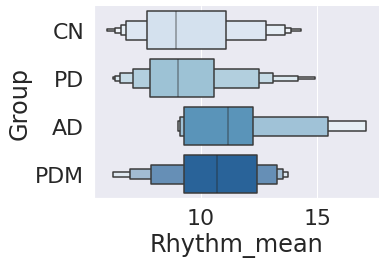

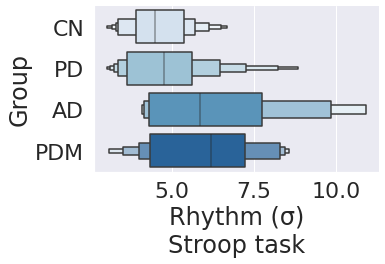

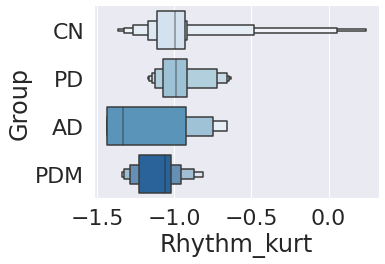

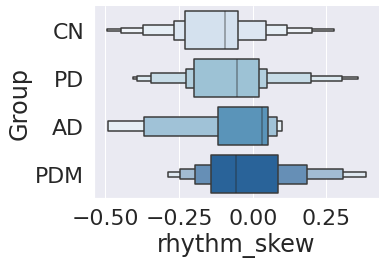

In [285]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_Plot/{nome}', facecolor='white', dpi=600)

## SEQUENCE TO PREVIOUS 2 (part of the stroop test)

In [24]:
grouped = seq2prev2.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 
parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")


others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [25]:
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]



task = seq2prev2.columns[2:-1].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(seq2prev2.columns[2:-1])])
others_all_feat = np.array([others[feat] for feat in np.array(seq2prev2.columns[2:-1])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(seq2prev2.columns[2:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(seq2prev2.columns[2:-1])])
#ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(seq2prev2.columns[2:-1])])




with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    
with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")

In [44]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/seq_2_prev_2_rt_pd_vs_otr.txt')


for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    alz = []
    #ataxia = []
    others= []
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i], alzheimer_all_feat[i], others_all_feat[i]])
    data = data.tolist()

    [controls.append('CTRL') for value in range(len(control_all_feat[i]))]
    #[ataxia.append('ATX') for value in range(len(ataxia_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    [alz.append('AD') for value in range(len(alzheimer_all_feat[i]))]
    [others.append('PDM') for value in range(len(others_all_feat[i]))]

    lista = controls+parkinson+alz+others
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_plot_SLT/{nome}', facecolor='white', dpi=600)

##  Word color (part of the stroop test)

In [164]:
grouped = word_color.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL")

parkinson_ = grouped.get_group("PD")
alzheimer =  grouped.get_group("AD")
#ataxia =  grouped.get_group("ATX")

others =  pd.concat([ grouped.get_group('CBS'),  
                     grouped.get_group('ET'), grouped.get_group('GSS'), grouped.get_group('WD'), 
                      grouped.get_group('PSP'), grouped.get_group('MIM')])

#grouped.get_group('SCZ')

#grouped.get_group('SCZ')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [165]:
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_102")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_98")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_95")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_87")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_85")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_57")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]



In [166]:
task = word_color.columns[2:-1].values.tolist()

alzheimer_all_feat = np.array([alzheimer[feat] for feat in np.array(word_color.columns[2:-1])])
others_all_feat = np.array([others[feat] for feat in np.array(word_color.columns[2:-1])])
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(word_color.columns[2:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(word_color.columns[2:-1])])
#ataxia_all_feat = np.array([ataxia[feat] for feat in np.array(word_color.columns[2:-1])])


In [167]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_cn_vs_pd.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

    
with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_cn_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, control_all_feat, others_all_feat, "control vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_pd_vs_otr.txt', 'w') as f:
    
    
    kruskal(f, task, parkinson_all_feat, others_all_feat, "parkinson vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ad_vs_otr.txt', 'w') as f:

    
    kruskal(f, task, alzheimer_all_feat, others_all_feat, "alzheimers vs.", "others")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_ad_vs_cn.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, control_all_feat, "alzheimers vs.", "controls")
    

with open('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ad_vs_pd.txt', 'w') as f:
    #final_sub
    
    kruskal(f, task, alzheimer_all_feat, parkinson_all_feat, "alzheimers vs.", "parkinson")

In [170]:
kruskal_1 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_ad_vs_cn.txt')
kruskal_2 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ad_vs_otr.txt')
kruskal_3 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_ad_vs_pd.txt')
kruskal_4 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_cn_vs_otr.txt')
kruskal_5 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_rt_cn_vs_pd.txt')
kruskal_6 = read_stats_test('/export/b14/afavaro/SLT_submission/cognitive/results/wc_pd_vs_otr.txt')